# **TRABAJO FINAL MACHINE LEARNING**

## Exploración de los datos

In [ ]:
#Importamos librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, silhouette_score
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LassoCV
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, OneHotEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.compose import ColumnTransformer

In [36]:
train=pd.read_csv("rendimiento_estudiantes_train.csv")
train

,escuela,sexo,edad,entorno,TamFam,EstPadres,Medu,Pedu,Mtrab,Ptrab,...,TiempoLib,SalAm,AlcSem,AlcFin,salud,faltas,asignatura,T1,T2,T3
0,IC,M,19,U,>=4,J,2.0,1.0,casa,otros,...,4,3,1.0,3,5,210.910377,L,8,9,9
1,BG,F,18,U,>=4,J,4.0,4.0,sanidad,sanidad,...,4,4,1.0,1,4,15.000000,M,9,8,8
2,BG,F,16,R,>=4,J,4.0,4.0,sanidad,docencia,...,4,4,2.0,3,4,0.000000,L,17,16,16
3,BG,F,16,U,<4,J,4.0,3.0,docencia,servicios,...,4,3,1.0,2,1,2.000000,L,16,15,16
4,BG,M,18,U,<4,J,3.0,3.0,servicios,sanidad,...,2,4,2.0,4,4,13.000000,M,6,6,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
830,IC,F,19,U,>=4,J,2.0,NaN,casa,servicios,...,4,4,1.0,1,2,0.000000,L,9,9,10
831,IC,F,18,U,<4,J,1.0,1.0,casa,servicios,...,3,2,1.0,1,4,0.000000,L,19,17,18
832,IC,F,15,R,>=4,J,3.0,3.0,servicios,otros,...,5,4,NaN,1,1,4.000000,L,13,12,12
833,BG,F,17,U,>=4,J,NaN,NaN,servicios,otros,...,3,5,2.0,4,4,4.000000,L,12,16,16


In [37]:
print(train.describe())
print("Estudiamos por encima los features")

             edad        Medu        Pedu  TiempoViaje  TiempoEstudio  \
count  835.000000  783.000000  731.000000   835.000000     819.000000   
mean    16.755689    2.628352    2.410397     1.520958       1.957265   
std      1.244730    1.115372    1.114586     0.711656       0.829988   
min     15.000000    0.000000    0.000000     1.000000       1.000000   
25%     16.000000    2.000000    2.000000     1.000000       1.000000   
50%     17.000000    3.000000    2.000000     1.000000       2.000000   
75%     18.000000    4.000000    3.000000     2.000000       2.000000   
max     22.000000    4.000000    4.000000     4.000000       4.000000   

        suspensos      RelFam   TiempoLib       SalAm      AlcSem      AlcFin  \
count  835.000000  818.000000  835.000000  835.000000  815.000000  835.000000   
mean     0.283832    3.904645    3.201198    3.132934    1.505521    2.276647   
std      0.680079    0.950786    1.030819    1.147536    0.920504    1.274682   
min      0.000000 

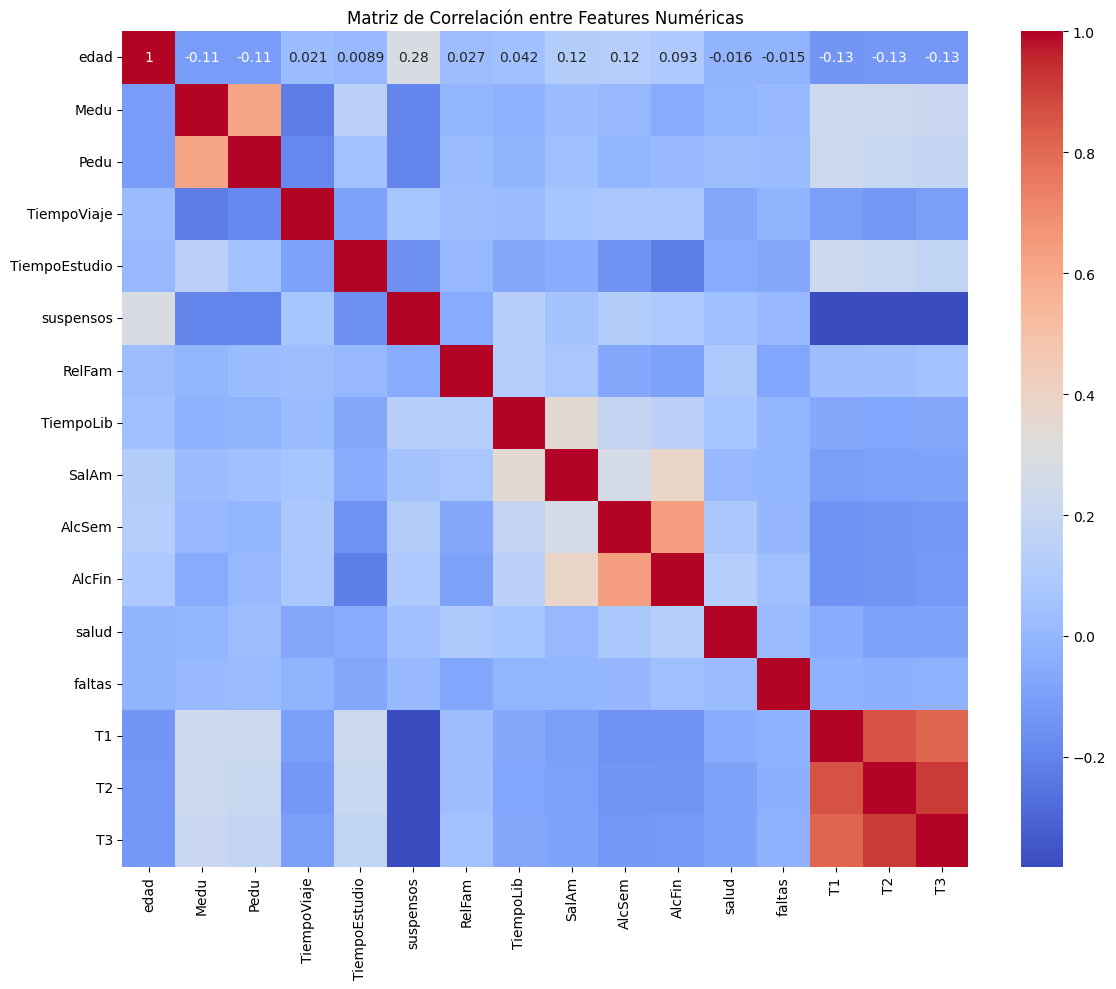

Analizamos posibles relaciones entre ellas para ir haciéndonos una idea


In [38]:
# Seleccionar solo las columnas numéricas del DataFrame
numeric_cols = train.select_dtypes(include=["int64", "float64"])

# Calcular la matriz de correlación
correlation_matrix = numeric_cols.corr()

# Visualizar la matriz con un mapa de calor
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Matriz de Correlación entre Features Numéricas")
plt.tight_layout()
plt.show()

print("Analizamos posibles relaciones entre ellas para ir haciéndonos una idea")

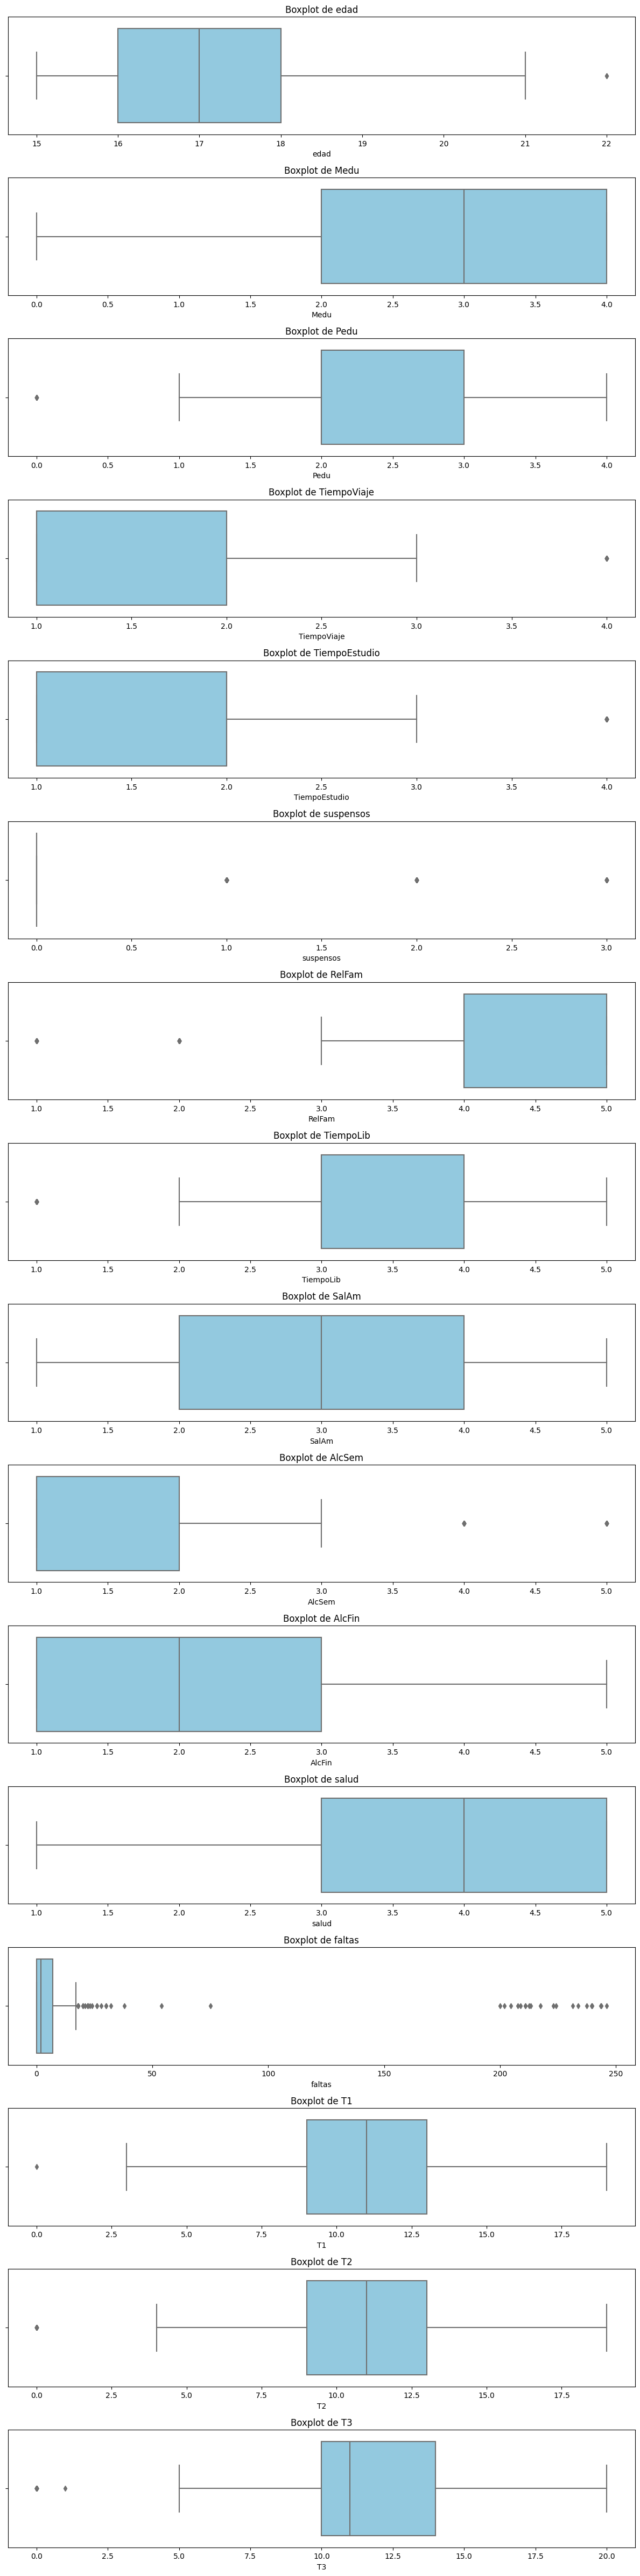

Buscamos outliers en cada una de las variables
Encontramos alguno en todos, pero todos posibles, salvo en faltas, el cual tiene muchos datos imposibles asi que lo estudiamos más detenidamente


In [39]:
# Seleccionar solo las columnas numéricas
numeric_cols = train.select_dtypes(include=["int64", "float64"]).columns.tolist()
plt.figure(figsize=(12, 3 * len(numeric_cols)))

# Crear un boxplot por cada variable numérica
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(len(numeric_cols), 1, i)
    sns.boxplot(data=train, x=col, color="skyblue")
    plt.title(f"Boxplot de {col}")
    plt.tight_layout()

plt.show()
print("Buscamos outliers en cada una de las variables")
print("Encontramos alguno en todos, pero todos posibles, salvo en faltas, el cual tiene muchos datos imposibles asi que lo estudiamos más detenidamente")

In [40]:
# Calcular Q1, Q3 e IQR
Q1 = train["faltas"].quantile(0.25)
Q3 = train["faltas"].quantile(0.75)
IQR = Q3 - Q1

# Definir límites inferior y superior
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

# Filtrar filas con outliers en 'faltas'
outliers_faltas = train[(train["faltas"] < limite_inferior) | (train["faltas"] > limite_superior)]

# Mostrar resultados
print(f"Número de outliers en 'faltas': {outliers_faltas.shape[0]}")
display(outliers_faltas)
print("Sin embargo, aunque muchos de estos datos sean considerados como outliers, no todos son irreales. Por ello, vamos a establecer el límite en 100")


Número de outliers en 'faltas': 44


,escuela,sexo,edad,entorno,TamFam,EstPadres,Medu,Pedu,Mtrab,Ptrab,...,TiempoLib,SalAm,AlcSem,AlcFin,salud,faltas,asignatura,T1,T2,T3
0,IC,M,19,U,>=4,J,2.0,1.0,casa,otros,...,4,3,1.0,3,5,210.910377,L,8,9,9
15,BG,F,16,U,>=4,J,2.0,1.0,otros,otros,...,5,2,1.0,1,5,20.000000,M,13,12,12
20,BG,M,17,U,<4,S,4.0,NaN,servicios,otros,...,5,4,2.0,4,5,30.000000,M,8,8,8
32,BG,M,16,R,>=4,S,4.0,NaN,otros,docencia,...,4,3,1.0,1,5,243.703589,M,15,16,15
40,BG,M,17,U,<4,S,3.0,2.0,docencia,servicios,...,4,4,3.0,4,3,18.000000,L,13,13,13
46,BG,M,19,U,>=4,J,3.0,3.0,otros,otros,...,4,4,1.0,1,3,20.000000,M,15,14,13
79,BG,M,15,U,>=4,J,3.0,4.0,servicios,servicios,...,5,5,NaN,2,5,233.638231,L,9,9,9
98,IC,F,18,R,>=4,J,1.0,1.0,casa,casa,...,2,3,1.0,1,2,246.036983,L,9,11,10
104,BG,M,16,R,>=4,J,4.0,4.0,docencia,docencia,...,5,5,2.0,5,4,202.002956,M,18,18,18
108,BG,M,17,U,<4,S,4.0,1.0,servicios,otros,...,5,4,2.0,4,5,22.000000,L,11,11,10


Sin embargo, aunque muchos de estos datos sean considerados como outliers, no todos son irreales. Por ello, vamos a establecer el límite en 100


In [41]:
filas_irreales = train[train["faltas"] > 100]
display(filas_irreales)

print("Me doy cuenta de que todas son con decimales, lo cual no puede ser y busco si son solo estas las que tienen decimales")
filas_decimales = train[train["faltas"] % 1 != 0]
print(f"Vemos si son iguales: {filas_irreales.equals(filas_decimales)}")


,escuela,sexo,edad,entorno,TamFam,EstPadres,Medu,Pedu,Mtrab,Ptrab,...,TiempoLib,SalAm,AlcSem,AlcFin,salud,faltas,asignatura,T1,T2,T3
0,IC,M,19,U,>=4,J,2.0,1.0,casa,otros,...,4,3,1.0,3,5,210.910377,L,8,9,9
32,BG,M,16,R,>=4,S,4.0,NaN,otros,docencia,...,4,3,1.0,1,5,243.703589,M,15,16,15
79,BG,M,15,U,>=4,J,3.0,4.0,servicios,servicios,...,5,5,NaN,2,5,233.638231,L,9,9,9
98,IC,F,18,R,>=4,J,1.0,1.0,casa,casa,...,2,3,1.0,1,2,246.036983,L,9,11,10
104,BG,M,16,R,>=4,J,4.0,4.0,docencia,docencia,...,5,5,2.0,5,4,202.002956,M,18,18,18
178,BG,F,15,U,>=4,S,3.0,3.0,servicios,servicios,...,3,2,2.0,3,1,204.688826,L,9,8,9
215,BG,F,17,U,<4,J,3.0,3.0,otros,otros,...,3,3,2.0,3,1,212.483448,M,9,9,8
227,IC,F,16,U,>=4,J,3.0,2.0,servicios,casa,...,1,3,1.0,4,3,237.513288,L,7,6,7
259,BG,M,17,R,<4,J,2.0,NaN,casa,otros,...,3,2,2.0,2,5,213.162367,L,8,8,9
296,BG,M,15,U,>=4,J,2.0,2.0,otros,otros,...,2,2,1.0,2,5,243.533452,M,12,12,11


Me doy cuenta de que todas son con decimales, lo cual no puede ser y busco si son solo estas las que tienen decimales
Vemos si son iguales: True


In [42]:
print("Quitamos todas las filas con esos valores ya que no alterarán en exceso la muestra al haber tantos estudiantes")
indices = train[train["faltas"] > 100].index.tolist()

train_quitado = train.drop(indices, axis=0, errors='ignore')

Quitamos todas las filas con esos valores ya que no alterarán en exceso la muestra al haber tantos estudiantes


In [43]:
# Detectar columnas con valores faltantes
valores_nulos = train_quitado.isnull().sum()

# Filtrar solo las columnas con al menos un valor nulo
faltantes = valores_nulos[valores_nulos > 0]

# Mostrar el resultado
print(faltantes)

print("Vemos las features con valores faltantes y las imputamos con la media")


faltantes = valores_nulos[valores_nulos > 0].index.tolist()

# Imputar con la media redondeada a entero
for col in faltantes:
    media_entera = round(train_quitado[col].mean())
    train_quitado[col].fillna(media_entera, inplace=True)

print("Para comprobar...")

# Detectar columnas con valores faltantes
valores_nulos = train_quitado.isnull().sum()

# Filtrar solo las columnas con al menos un valor nulo
faltantes = valores_nulos[valores_nulos > 0]

# Mostrar el resultado
print(faltantes)


Medu              50
Pedu             100
TiempoEstudio     16
RelFam            16
AlcSem            19
dtype: int64
Vemos las features con valores faltantes y las imputamos con la media
Para comprobar...
Series([], dtype: int64)


In [44]:

mapeos_binarios = {
    "sexo": {"M": 0, "F": 1},
    "escuela": {"IC": 0, "BG": 1},
    "entorno": {"U": 0, "R": 1},
    "TamFam": {"<4": 0, ">=4": 1},
    "EstPadres": {"J": 0, "S": 1},
    "apoyo": {"no": 0, "si": 1},
    "ApFam": {"no": 0, "si": 1},
    "academia": {"no": 0, "si": 1},
    "extras": {"no": 0, "si": 1},
    "enfermeria": {"no": 0, "si": 1},
    "EstSup": {"no": 0, "si": 1},
    "internet": {"no": 0, "si": 1},
    "pareja": {"no": 0, "si": 1},
    "asignatura": {"M": 0, "L": 1}
}

# Aplicar el mapeo a cada columna
for col, mapping in mapeos_binarios.items():
    train_quitado[col] = train_quitado[col].map(mapping)

# Verificar el resultado
print(train_quitado)


print("Conseguimos así tener todas las variables binarias numéricas")

     escuela  sexo  edad  entorno  TamFam  EstPadres  Medu  Pedu      Mtrab  \
1          1     1    18        0       1          0   4.0   4.0    sanidad   
2          1     1    16        1       1          0   4.0   4.0    sanidad   
3          1     1    16        0       0          0   4.0   3.0   docencia   
4          1     0    18        0       0          0   3.0   3.0  servicios   
5          1     0    18        0       1          0   1.0   2.0       casa   
..       ...   ...   ...      ...     ...        ...   ...   ...        ...   
830        0     1    19        0       1          0   2.0   2.0       casa   
831        0     1    18        0       0          0   1.0   1.0       casa   
832        0     1    15        1       1          0   3.0   3.0  servicios   
833        1     1    17        0       1          0   3.0   2.0  servicios   
834        1     1    18        0       1          0   2.0   2.0       casa   

         Ptrab  ... TiempoLib SalAm  AlcSem  AlcFin

In [45]:
columnas_no_numericas = train_quitado.select_dtypes(exclude=["int64", "float64"]).columns.tolist()
print(columnas_no_numericas)
print("Quedan estas columnas por pasar a numérico, las cuales no son binarias.")
for i in columnas_no_numericas:
    print(f"{i}:{train_quitado[i].unique()}")
print("Hacemos una modificación en razon ya que podemos considerar otros y otras como lo mismo")
train_quitado["razon"]=train_quitado["razon"].replace("otras","otros")

train_nuevo = pd.get_dummies(train_quitado, columns=columnas_no_numericas, drop_first=True)
display(train_nuevo)

['Mtrab', 'Ptrab', 'razon', 'tutor']
Quedan estas columnas por pasar a numérico, las cuales no son binarias.
Mtrab:['sanidad' 'docencia' 'servicios' 'casa' 'otros']
Ptrab:['sanidad' 'docencia' 'servicios' 'otros' 'casa']
razon:['reputacion' 'otras' 'optativas' 'cercania' 'otros']
tutor:['padre' 'madre' 'otros']
Hacemos una modificación en razon ya que podemos considerar otros y otras como lo mismo


,escuela,sexo,edad,entorno,TamFam,EstPadres,Medu,Pedu,TiempoViaje,TiempoEstudio,...,Mtrab_servicios,Ptrab_docencia,Ptrab_otros,Ptrab_sanidad,Ptrab_servicios,razon_optativas,razon_otros,razon_reputacion,tutor_otros,tutor_padre
1,1,1,18,0,1,0,4.0,4.0,1,2.0,...,0,0,0,1,0,0,0,1,0,1
2,1,1,16,1,1,0,4.0,4.0,1,2.0,...,0,1,0,0,0,0,1,0,0,0
3,1,1,16,0,0,0,4.0,3.0,3,2.0,...,0,0,0,0,1,1,0,0,0,0
4,1,0,18,0,0,0,3.0,3.0,1,2.0,...,1,0,0,1,0,0,0,0,0,1
5,1,0,18,0,1,0,1.0,2.0,2,1.0,...,0,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
830,0,1,19,0,1,0,2.0,2.0,1,1.0,...,0,0,0,0,1,1,0,0,1,0
831,0,1,18,0,0,0,1.0,1.0,2,3.0,...,0,0,0,0,1,1,0,0,0,1
832,0,1,15,1,1,0,3.0,3.0,1,2.0,...,1,0,1,0,0,0,0,1,0,0
833,1,1,17,0,1,0,3.0,2.0,1,2.0,...,1,0,1,0,0,0,0,1,0,0


In [46]:
X=train_nuevo.drop("T3",axis=1)
y=train_nuevo["T3"].values
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Oficialmente ya tenemos el dataset limpio para empezar a trabajar")

Oficialmente ya tenemos el dataset limpio para empezar a trabajar


## PREDICCIONES
### Modelo I

### Funciones importantes para el análisis

In [47]:
def porcentaje_aciertos(y_pred,y_true):
    aciertos=0
    if len(y_pred) != len(y_true):
        return ("Datos no aceptados")
    else:
        for i in range(len(y_pred)):
            if y_pred[i]==y_true[i]:
                aciertos +=1
        return f"{(aciertos/len(y_true))*100}%"
    

def plot_importancia_variables(modelo, feature_names, top_n=None):
    """
    Grafica la importancia de las variables basada en los coeficientes del modelo lineal.

    Compatible tanto con modelos personalizados como con modelos de sklearn como Lasso.

    Args:
        modelo: Modelo de regresión (con atributo 'coefficients' o 'coef_').
        feature_names: Lista de nombres de las variables.
        top_n: Número de variables más importantes a mostrar.
    """
    # Detecta automáticamente si el modelo tiene coef_ (sklearn) o coefficients (personalizado)
    if hasattr(modelo, 'coef_'):
        coeficientes = modelo.coef_
    elif hasattr(modelo, 'coefficients'):
        coeficientes = modelo.coefficients
    else:
        raise AttributeError("El modelo no tiene atributos coef_ ni coefficients.")

    df_importancia = pd.DataFrame({
        'Variable': feature_names,
        'Coeficiente': coeficientes
    })

    df_importancia['Importancia'] = df_importancia['Coeficiente'].abs()
    df_importancia = df_importancia.sort_values('Importancia', ascending=False)

    if top_n is not None:
        df_importancia = df_importancia.head(top_n)

    plt.figure(figsize=(10, 6))
    colores = df_importancia['Coeficiente'].apply(lambda x: 'red' if x < 0 else 'blue')
    plt.barh(df_importancia['Variable'], df_importancia['Coeficiente'], color=colores)
    plt.xlabel('Coeficiente')
    plt.ylabel('Variable')
    plt.title('Importancia de las Variables')
    plt.gca().invert_yaxis()
    plt.grid(True)
    plt.show()


def evaluate_regression(y_true, y_pred, nombre_modelo):
    """
    Evaluates the performance of a regression model by calculating R^2, RMSE, and MAE.

    Args:
        y_true (np.ndarray): True values of the dependent variable.
        y_pred (np.ndarray): Predicted values by the regression model.

    Returns:
        dict: A dictionary containing the R^2, RMSE, and MAE values.
    """

    # R^2 Score
    # TODO
    ss_total = np.sum((y_true - np.mean(y_true)) ** 2)
    ss_residual = np.sum((y_true - y_pred) ** 2)
    r_squared = 1 - (ss_residual / ss_total)

    # Root Mean Squared Error
    # TODO
    n = y_true.shape[0]
    rmse = np.sqrt((1/n)*np.sum((y_true - y_pred)**2))

    # Mean Absolute Error
    # TODO
    mae = (1/n)*np.sum(abs(y_true - y_pred))

    aciertos = porcentaje_aciertos(y_pred,y_true)
    
    return {nombre_modelo :{"R2": r_squared, "RMSE": rmse, "MAE": mae, "%Aciertos": {aciertos}}}
   

### Regresión Lineal

In [48]:
class LinearRegression:
    """
    Linear Regression model with support for gradient descent and least squares fitting.
    """

    def __init__(self):
        self.coefficients = None
        self.intercept = None

    def fit(self, X, y, method="least_squares", learning_rate=0.01, iterations=1000):
        """
        Fit the model using either the normal equation or gradient descent.

        Args:
            X (np.ndarray or pd.DataFrame): Features.
            y (np.ndarray or pd.Series): Target.
            method (str): 'least_squares' or 'gradient_descent'.
            learning_rate (float): For gradient descent.
            iterations (int): For gradient descent.
        """
        if isinstance(X, pd.DataFrame):
            X = X.to_numpy()
        if isinstance(y, (pd.Series, pd.DataFrame)):
            y = y.to_numpy().ravel()

        if np.ndim(X) == 1:
            X = X.reshape(-1, 1)

        X_with_bias = np.c_[np.ones((X.shape[0], 1)), X]

        if method == "least_squares":
            self.fit_multiple(X_with_bias, y)
        elif method == "gradient_descent":
            return self.fit_gradient_descent(X_with_bias, y, learning_rate, iterations)
        else:
            raise ValueError(f"Method {method} not supported.")

    def fit_multiple(self, X, y):
        """
        Fit the model using the closed-form least squares solution.
        """
        beta = np.linalg.pinv(X.T @ X) @ X.T @ y
        self.intercept = beta[0]
        self.coefficients = beta[1:]

    def fit_gradient_descent(self, X, y, learning_rate=0.01, iterations=1000):
        """
        Fit the model using batch gradient descent.
        """
        m = len(y)
        self.coefficients = np.random.rand(X.shape[1] - 1) * 0.01
        self.intercept = np.random.rand() * 0.01

        valores_mse = []
        valores_param = []

        for epoch in range(iterations):
            predictions = self.predict(X[:, 1:])
            error = predictions - y
            gradient = (1 / m) * (error @ X)

            self.intercept -= learning_rate * gradient[0]
            self.coefficients -= learning_rate * gradient[1:]

            valores_param.append(np.concatenate(([self.intercept], self.coefficients)))
            mse = np.mean(error ** 2)
            valores_mse.append(mse)

            if epoch % 1000 == 0:
                print(f"Epoch {epoch}: MSE = {mse:.4f}")

        return valores_param, valores_mse

    def predict(self, X):
        """
        Make predictions using the trained model.
        """
        if self.coefficients is None or self.intercept is None:
            raise ValueError("Model is not fitted.")

        if isinstance(X, pd.DataFrame):
            X = X.to_numpy()
        if np.ndim(X) == 1:
            return self.intercept + self.coefficients * X
        else:
            X_with_bias = np.c_[np.ones((X.shape[0], 1)), X]
            beta = np.concatenate(([self.intercept], self.coefficients))
            return X_with_bias @ beta
    


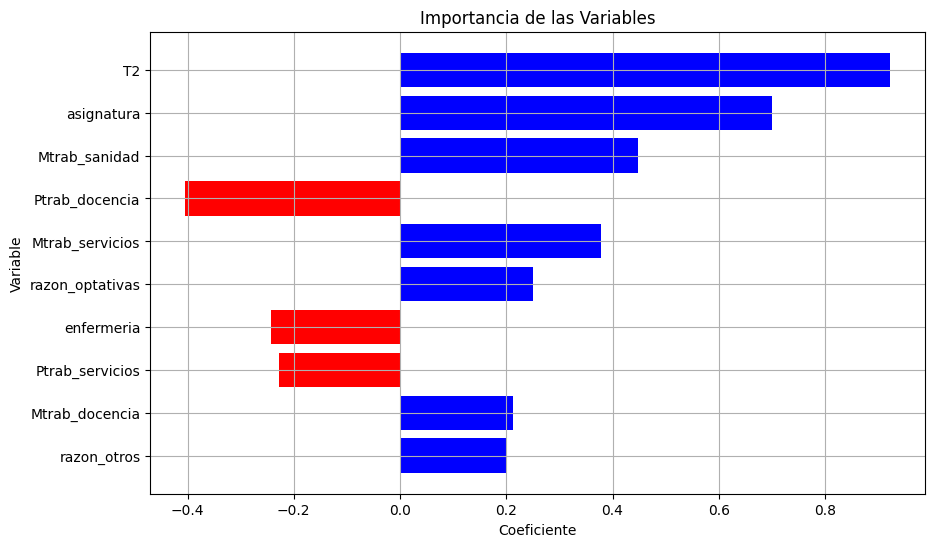

{'Regresión Lineal (TRAIN)': {'R2': 0.8372431394818697, 'RMSE': 1.6415801156427363, 'MAE': 0.9401840490797546, '%Aciertos': {'41.25766871165644%'}}}
{'Regresión Lineal (VALIDATION)': {'R2': 0.8610308413101448, 'RMSE': 1.4033264600135755, 'MAE': 0.9263803680981595, '%Aciertos': {'38.65030674846626%'}}}


In [49]:
# Vamos a realizar una regresión lineal simple
modelo=LinearRegression()
modelo.fit(X_train,y_train)
# Predicciones
y_train_pred = modelo.predict(X_train).round()
y_val_pred = modelo.predict(X_val).round()



# Crear un DataFrame con X_val, y_val y y_val_pred
df_val = X_val.copy()
df_val['Real'] = y_val
df_val['Predicción'] = y_val_pred

plot_importancia_variables(modelo,X_train.columns,10)
print(evaluate_regression(y_train,y_train_pred,"Regresión Lineal (TRAIN)"))
print(evaluate_regression(y_val,y_val_pred,"Regresión Lineal (VALIDATION)"))


### Regresión Lineal usando regularización Lasso

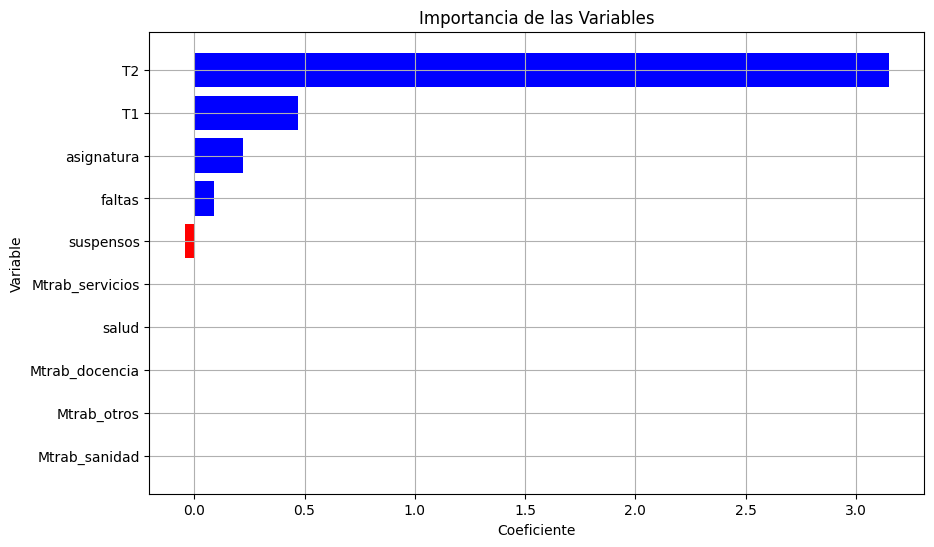

{'Regresión Lineal + Lasso (TRAIN)': {'R2': 0.8354831051336371, 'RMSE': 1.6504321798753496, 'MAE': 0.9079754601226994, '%Aciertos': {'42.79141104294479%'}}}
{'Regresión Lineal + Lasso (VALIDATION)': {'R2': 0.8670918015022258, 'RMSE': 1.3723831763840906, 'MAE': 0.8282208588957055, '%Aciertos': {'44.171779141104295%'}}}
Así trabajamos con las más importantes


In [50]:
alphas = np.logspace(-4, 2, 100)
cv=5
# Escalado
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
lasso_cv = LassoCV(alphas=alphas, cv=cv, max_iter=10000, random_state=42)
lasso_cv.fit(X_train_scaled,y_train)
lasso_cv_pred=lasso_cv.predict(X_train_scaled).round()
lasso_cv_val_pred = lasso_cv.predict(X_val_scaled).round()


# Crear un DataFrame con X_val, y_val y y_val_pred
df_val = X_val.copy()
df_val['Real'] = y_val
df_val['Predicción'] = lasso_cv_val_pred
plot_importancia_variables(lasso_cv,X_train.columns,10)
print(evaluate_regression(y_train,lasso_cv_pred,"Regresión Lineal + Lasso (TRAIN)"))
print(evaluate_regression(y_val,lasso_cv_val_pred,"Regresión Lineal + Lasso (VALIDATION)"))

print("Así trabajamos con las más importantes")

### Random Forest

Mejores parámetros encontrados:
{'max_depth': 5, 'min_samples_leaf': 1, 'n_estimators': 200}
{'Random Forest (TRAIN)': {'R2': 0.9776753537934721, 'RMSE': 0.6079736029142144, 'MAE': 0.23159509202453987, '%Aciertos': {'82.20858895705521%'}}}
{'Random Forest (VALIDATION)': {'R2': 0.907786819934769, 'RMSE': 1.1431309926065643, 'MAE': 0.7791411042944786, '%Aciertos': {'41.717791411042946%'}}}


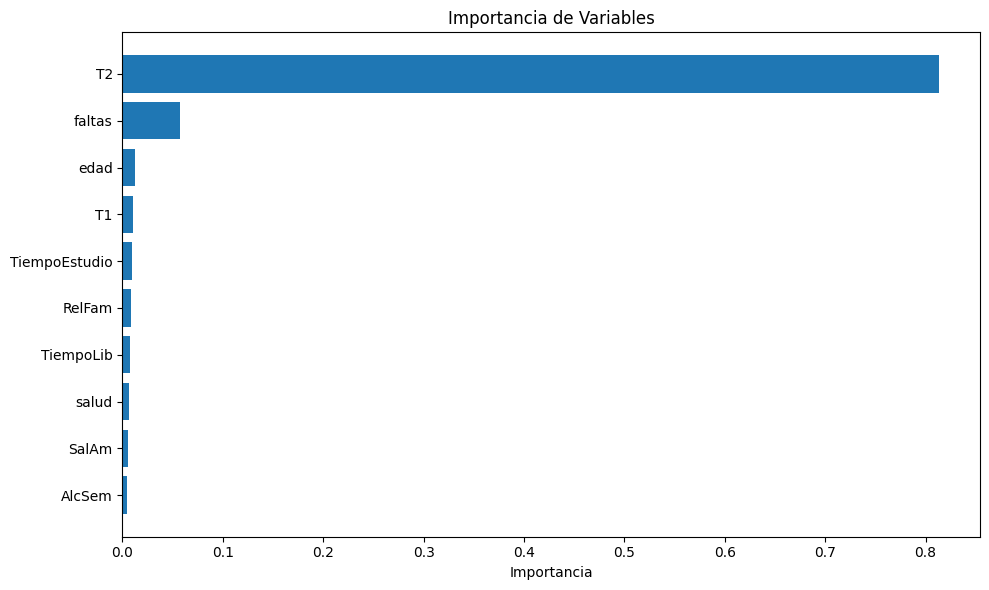

In [51]:
model = RandomForestRegressor(random_state=42)
param_grid={'n_estimators': [100, 200],
'max_depth': [1,3,5,7],
'min_samples_leaf': [1, 2, 3]}


grid_search = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    cv=5,
    n_jobs=-1,
    scoring='neg_mean_squared_error'
)

grid_search.fit(X_train, y_train)

print("Mejores parámetros encontrados:")
print(grid_search.best_params_)
model.fit(X_train, y_train)
# Predicción
y_train_pred = model.predict(X_train).round()
y_val_pred = model.predict(X_val).round()
print(evaluate_regression(y_train,y_train_pred,"Random Forest (TRAIN)"))
print(evaluate_regression(y_val,y_val_pred,"Random Forest (VALIDATION)"))

importancias = model.feature_importances_
df_importancias = pd.DataFrame({'Feature': X_train.columns, 'Importancia': importancias})
df_importancias = df_importancias.sort_values(by='Importancia', ascending=False).head(10)

plt.figure(figsize=(10, 6))
plt.barh(df_importancias['Feature'], df_importancias['Importancia'])
plt.gca().invert_yaxis()  # Mostrar la más importante arriba
plt.title("Importancia de Variables")
plt.xlabel("Importancia")
plt.tight_layout()
plt.show()

### Boosting

Mejores hiperparámetros encontrados:
{'learning_rate': 0.05, 'max_depth': 3}
{'Boosting (TRAIN)': {'R2': 0.9162594183788333, 'RMSE': 1.1774986486126693, 'MAE': 0.6717791411042945, '%Aciertos': {'50.306748466257666%'}}}
{'Boosting (VALIDATION)': {'R2': 0.9047563398387285, 'RMSE': 1.1617629928405115, 'MAE': 0.7361963190184049, '%Aciertos': {'47.239263803680984%'}}}


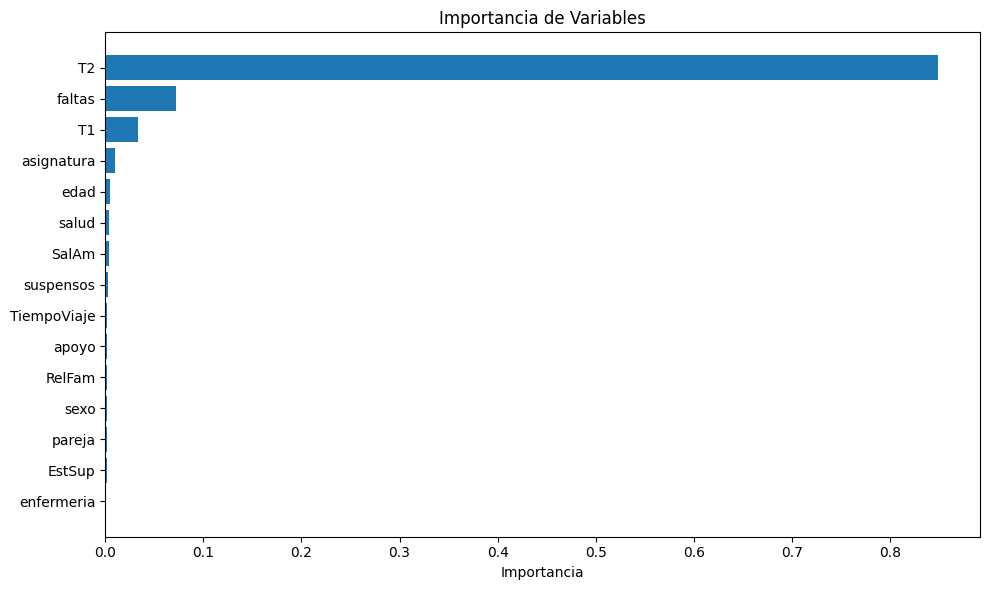

In [52]:
# Grid de hiperparámetros
param_grid = {
    'learning_rate': [0.05, 0.1, 0.15],
    'max_depth': [3, 4, 5]
}

grid_search = GridSearchCV(
    GradientBoostingRegressor(random_state=42),
    param_grid,
    scoring='neg_mean_squared_error',
    cv=5,
    n_jobs=-1
)

# Entrenamiento
grid_search.fit(X_train, y_train)
best_model = grid_search.best_estimator_
print("Mejores hiperparámetros encontrados:")
print(grid_search.best_params_)

# Evaluación
y_train_pred = best_model.predict(X_train).round()
y_val_pred = best_model.predict(X_val).round()
print(evaluate_regression(y_train,y_train_pred,"Boosting (TRAIN)"))
print(evaluate_regression(y_val,y_val_pred,"Boosting (VALIDATION)"))

# Importancia de variables
importancias = best_model.feature_importances_
df_importancias = pd.DataFrame({'Feature': X_train.columns, 'Importancia': importancias})
df_importancias = df_importancias.sort_values(by='Importancia', ascending=False).head(15)

plt.figure(figsize=(10, 6))
plt.barh(df_importancias['Feature'], df_importancias['Importancia'])
plt.gca().invert_yaxis()
plt.title('Importancia de Variables')
plt.xlabel('Importancia')
plt.tight_layout()
plt.show()

#### CONCLUSIONES DE LOS MODELOS

| MODELO                     | MAE (Train) | RMSE (Train)  | R² (Train) | MAE (Val) | RMSE (Val)  | R² (Val)  | % Aciertos (Val)  |
|----------------------------|-------------|---------------|------------|-----------|-------------|-----------|-------------------|
| Regresión Lineal           | 0.9402      | 1.6416        | 0.8372     | 0.9264    | 1.4033      | 0.8610    | 38.65%            |
| Regresión + Lasso          | 0.9080      | 1.6504        | 0.8355     | 0.8282    | 1.3723      | 0.8671    | 44.17%            |
| Random Forest              | 0.2316      | 0.6078        | 0.9768     | 0.7791    | 1.1431      | 0.9077    | 41.71%            |
| Boosting                   | 0.6718      | 1.1775        | 0.9163     | 0.7362    | 1.1618      | 0.9047    | 47.24%            |



## Modelo 2

### Vamos a ver ahora como predicen estos modelos sin tener T2 y T3

In [53]:
X=train_nuevo.drop(["T3","T2","T1"],axis=1)
y=train_nuevo["T3"].values
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, random_state=42
)

### Regresión Lineal

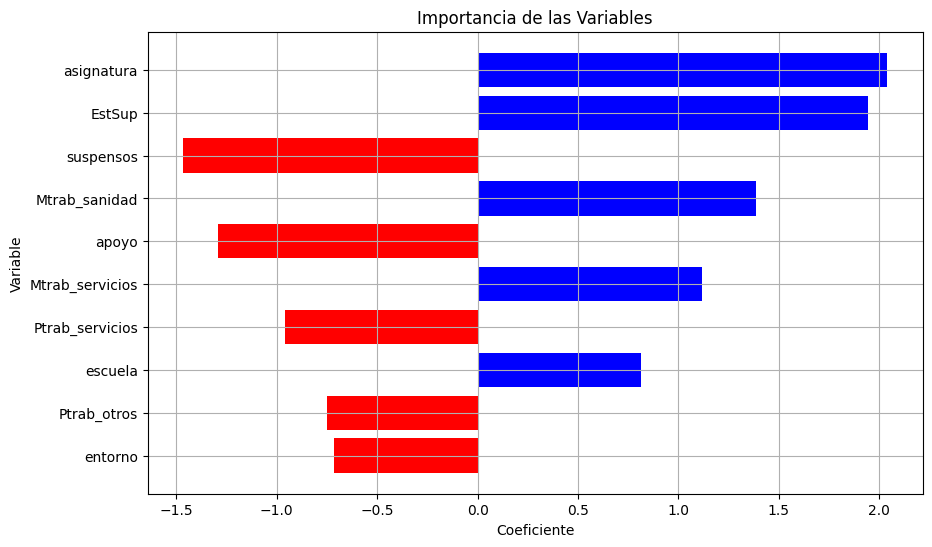

{'Regresión Lineal (TRAIN)': {'R2': 0.2963567942540022, 'RMSE': 3.4132545683652515, 'MAE': 2.441717791411043, '%Aciertos': {'16.104294478527606%'}}}
{'Regresión Lineal (VALIDATION)': {'R2': 0.2731177026782964, 'RMSE': 3.209456885040289, 'MAE': 2.4723926380368098, '%Aciertos': {'15.950920245398773%'}}}


In [54]:
# Vamos a realizar una regresión lineal simple
modelo=LinearRegression()
modelo.fit(X_train,y_train)
# Predicciones
y_train_pred = modelo.predict(X_train).round()
y_val_pred = modelo.predict(X_val).round()



# Crear un DataFrame con X_val, y_val y y_val_pred
df_val = X_val.copy()
df_val['Real'] = y_val
df_val['Predicción'] = y_val_pred

plot_importancia_variables(modelo,X_train.columns,10)
print(evaluate_regression(y_train,y_train_pred,"Regresión Lineal (TRAIN)"))
print(evaluate_regression(y_val,y_val_pred,"Regresión Lineal (VALIDATION)"))


### Regresión Lineal + Lasso

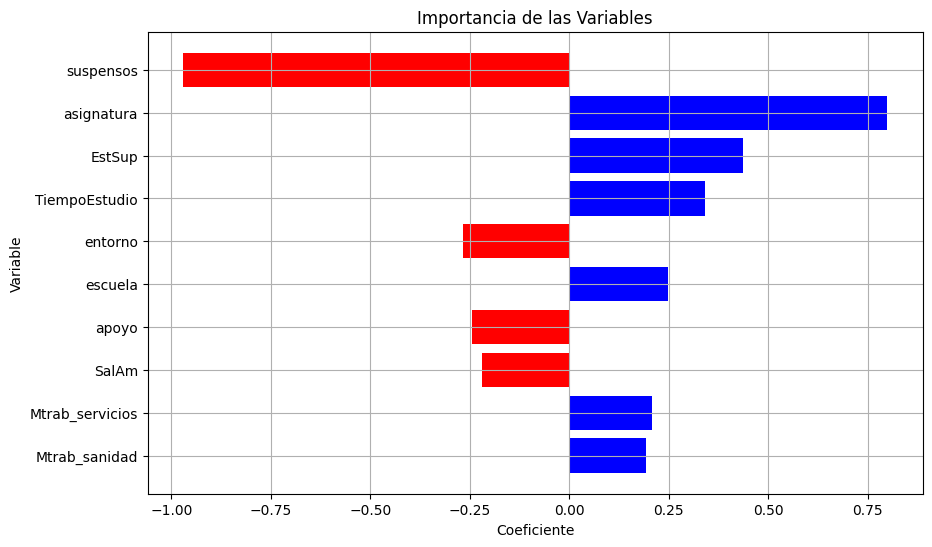

{'Regresión Lineal + Lasso (TRAIN)': {'R2': 0.26032240680861085, 'RMSE': 3.4995617604690765, 'MAE': 2.476993865030675, '%Aciertos': {'15.797546012269938%'}}}
{'Regresión Lineal + Lasso (VALIDATION)': {'R2': 0.2709530740382675, 'RMSE': 3.2142321545834682, 'MAE': 2.4049079754601226, '%Aciertos': {'18.404907975460123%'}}}


In [55]:
alphas = np.logspace(-4, 2, 100)
cv=5
# Escalado
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
lasso_cv = LassoCV(alphas=alphas, cv=cv, max_iter=10000, random_state=42)
lasso_cv.fit(X_train_scaled,y_train)
lasso_cv_pred=lasso_cv.predict(X_train_scaled).round()
lasso_cv_val_pred = lasso_cv.predict(X_val_scaled).round()


# Crear un DataFrame con X_val, y_val y y_val_pred
df_val = X_val.copy()
df_val['Real'] = y_val
df_val['Predicción'] = lasso_cv_val_pred
plot_importancia_variables(lasso_cv,X_train.columns,10)
print(evaluate_regression(y_train,lasso_cv_pred,"Regresión Lineal + Lasso (TRAIN)"))
print(evaluate_regression(y_val,lasso_cv_val_pred,"Regresión Lineal + Lasso (VALIDATION)"))

### Random Forest

Mejores parámetros encontrados:
{'max_depth': 7, 'min_samples_leaf': 2, 'n_estimators': 200}
{'Random Forest (TRAIN)': {'R2': 0.898195907962763, 'RMSE': 1.2982999738449854, 'MAE': 0.8665644171779141, '%Aciertos': {'40.644171779141104%'}}}
{'Random Forest (VALIDATION)': {'R2': 0.2925993604385565, 'RMSE': 3.166155377946669, 'MAE': 2.3803680981595092, '%Aciertos': {'14.11042944785276%'}}}


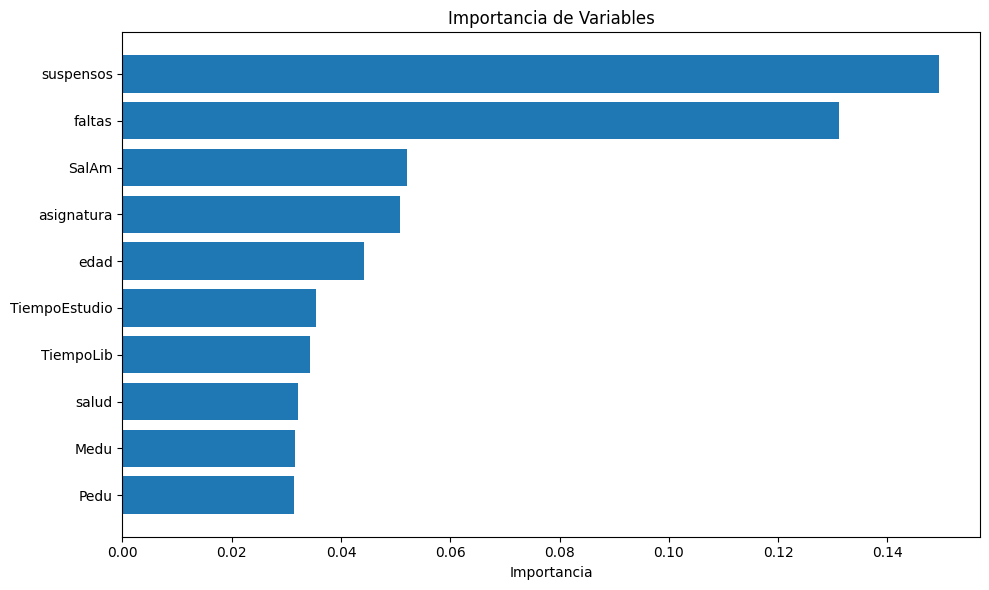

In [56]:
model = RandomForestRegressor(random_state=42)
param_grid={'n_estimators': [100, 200],
'max_depth': [1,3,5,7],
'min_samples_leaf': [1, 2, 3]}


grid_search = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    cv=5,
    n_jobs=-1,
    scoring='neg_mean_squared_error'
)

grid_search.fit(X_train, y_train)

print("Mejores parámetros encontrados:")
print(grid_search.best_params_)
model.fit(X_train, y_train)
# Predicción
y_train_pred = model.predict(X_train).round()
y_val_pred = model.predict(X_val).round()
print(evaluate_regression(y_train,y_train_pred,"Random Forest (TRAIN)"))
print(evaluate_regression(y_val,y_val_pred,"Random Forest (VALIDATION)"))

importancias = model.feature_importances_
df_importancias = pd.DataFrame({'Feature': X_train.columns, 'Importancia': importancias})
df_importancias = df_importancias.sort_values(by='Importancia', ascending=False).head(10)

plt.figure(figsize=(10, 6))
plt.barh(df_importancias['Feature'], df_importancias['Importancia'])
plt.gca().invert_yaxis()  # Mostrar la más importante arriba
plt.title("Importancia de Variables")
plt.xlabel("Importancia")
plt.tight_layout()
plt.show()

### Boosting

Mejores hiperparámetros encontrados:
{'learning_rate': 0.1, 'max_depth': 3}
{'Boosting (TRAIN)': {'R2': 0.6656861072225768, 'RMSE': 2.3527167431757765, 'MAE': 1.719325153374233, '%Aciertos': {'20.705521472392636%'}}}
{'Boosting (VALIDATION)': {'R2': 0.32939804731904776, 'RMSE': 3.0827045730433813, 'MAE': 2.423312883435583, '%Aciertos': {'11.65644171779141%'}}}


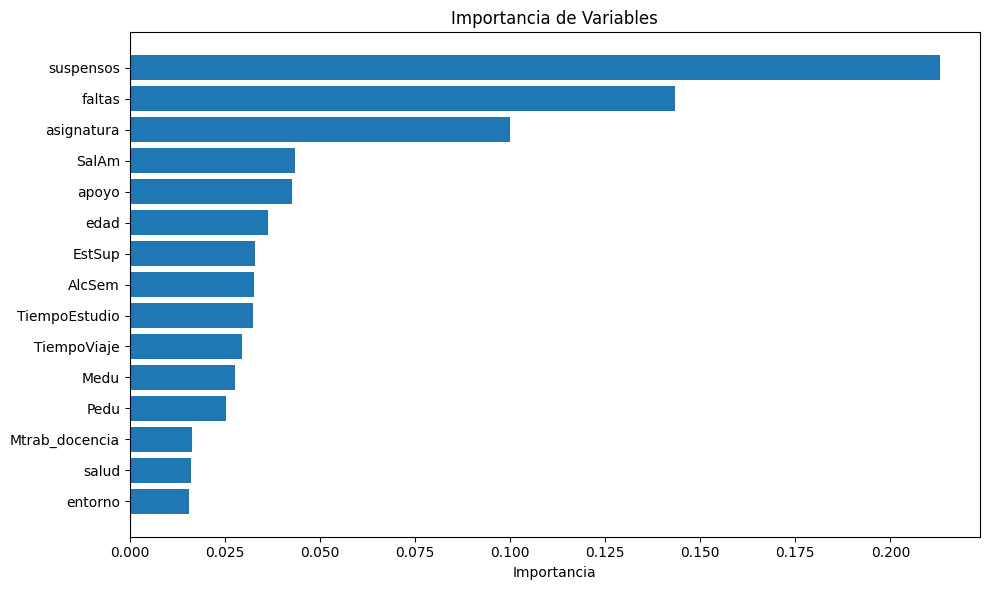

In [57]:
# Grid de hiperparámetros
param_grid = {
    'learning_rate': [0.05, 0.1, 0.15],
    'max_depth': [3, 4, 5]
}

grid_search = GridSearchCV(
    GradientBoostingRegressor(random_state=42),
    param_grid,
    scoring='neg_mean_squared_error',
    cv=5,
    n_jobs=-1
)

# Entrenamiento
grid_search.fit(X_train, y_train)
best_model = grid_search.best_estimator_
print("Mejores hiperparámetros encontrados:")
print(grid_search.best_params_)

# Evaluación
y_train_pred = best_model.predict(X_train).round()
y_val_pred = best_model.predict(X_val).round()
print(evaluate_regression(y_train,y_train_pred,"Boosting (TRAIN)"))
print(evaluate_regression(y_val,y_val_pred,"Boosting (VALIDATION)"))

# Importancia de variables
importancias = best_model.feature_importances_
df_importancias = pd.DataFrame({'Feature': X_train.columns, 'Importancia': importancias})
df_importancias = df_importancias.sort_values(by='Importancia', ascending=False).head(15)

plt.figure(figsize=(10, 6))
plt.barh(df_importancias['Feature'], df_importancias['Importancia'])
plt.gca().invert_yaxis()
plt.title('Importancia de Variables')
plt.xlabel('Importancia')
plt.tight_layout()
plt.show()

#### CONCLUSIONES DE LOS MODELOS 

| MODELO                     | MAE (Train) | RMSE (Train) | R² (Train) | MAE (Val) | RMSE (Val) | R² (Val) | % Aciertos (Val) |
|----------------------------|-------------|--------------|------------|-----------|------------|----------|------------------|
| Regresión Lineal           | 2.4417      | 3.4133       | 0.2964     | 2.4724    | 3.2095     | 0.2731   | 15.95%           |
| Regresión + Lasso          | 2.4770      | 3.4996       | 0.2710     | 2.4050    | 3.2142     | 0.2710   | 18.40%           |
| Random Forest              | 0.8666      | 1.2983       | 0.8982     | 2.3804    | 3.1662     | 0.2926   | 14.11%           |
| Gradient Boosting          | 1.7193      | 2.3527       | 0.6657     | 2.4233    | 3.0827     | 0.3294   | 11.66%           |



### EXPLORACIÓN ADICIONAL

c:\Users\Pablo\Downloads\Anaconda python\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Pablo\Downloads\Anaconda python\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
c:\Users\Pablo\Downloads\Anaconda python\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Pablo\Downloads\Anaconda python\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is

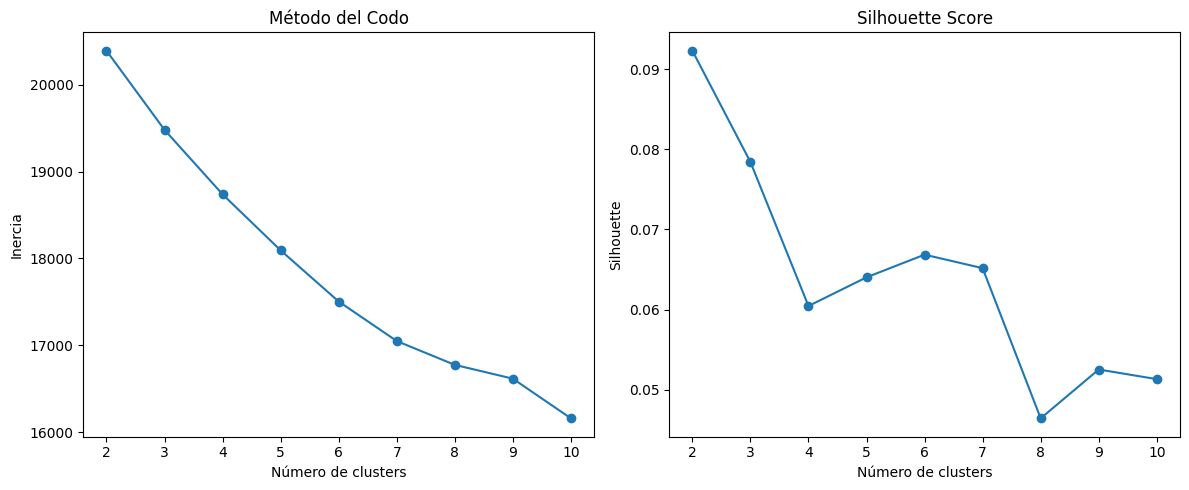

c:\Users\Pablo\Downloads\Anaconda python\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Pablo\Downloads\Anaconda python\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


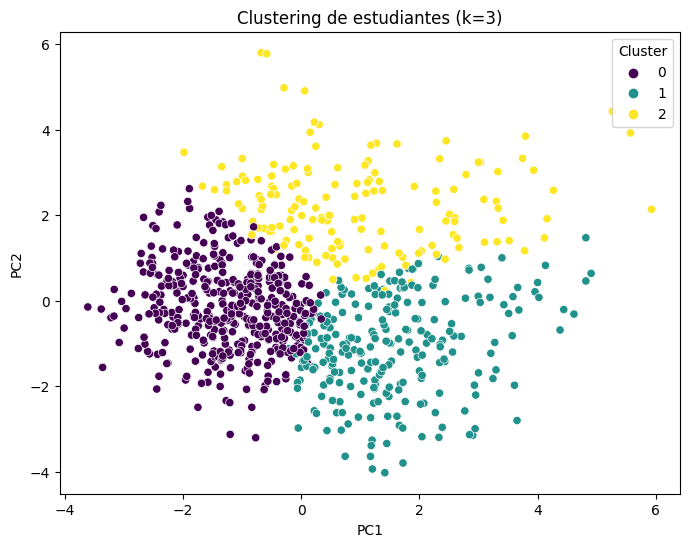

          escuela      sexo       edad   entorno    TamFam  EstPadres  \
Cluster                                                                 
0        0.907363  0.648456  16.422803  0.130641  0.710214   0.114014   
1        0.400826  0.628099  17.140496  0.570248  0.714876   0.115702   
2        0.822368  0.236842  17.105263  0.203947  0.651316   0.111842   

             Medu      Pedu  TiempoViaje  TiempoEstudio  ...  Ptrab_sanidad  \
Cluster                                                  ...                  
0        3.092637  2.703088     1.315914       2.194774  ...       0.064133   
1        1.756198  1.657025     1.851240       1.739669  ...       0.004132   
2        2.855263  2.519737     1.572368       1.690789  ...       0.026316   

         Ptrab_servicios  razon_optativas  razon_otros  razon_reputacion  \
Cluster                                                                    
0               0.261283         0.349169     0.083135          0.299287   
1         

Text(0.5, 1.0, 'Distribución de nota final (T3) por cluster')

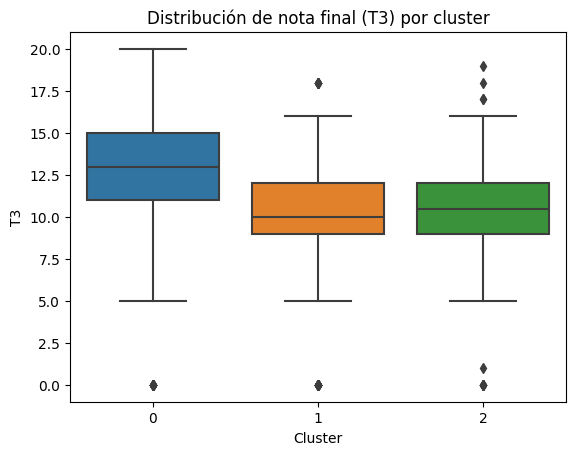

In [58]:
# Usamos el DataFrame ya limpio
df_cluster = train_nuevo.drop(columns=["T1", "T2", "T3"])  # Quitamos las notas

# Identificamos columnas categóricas y numéricas
cat_cols = df_cluster.select_dtypes(include='object').columns.tolist()
num_cols = df_cluster.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Preprocesador: OneHotEncoder para categóricas, StandardScaler para numéricas
preprocessor = ColumnTransformer([
    ('cat', OneHotEncoder(drop='first'), cat_cols),
    ('num', StandardScaler(), num_cols)
])

# Aplicamos el preprocesamiento
X_transformed = preprocessor.fit_transform(df_cluster)

# Método del codo y silhouette
inertias = []
silhouettes = []
K = range(2, 11)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_transformed)
    inertias.append(kmeans.inertia_)
    silhouettes.append(silhouette_score(X_transformed, kmeans.labels_))

# Gráficos de evaluación
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(K, inertias, marker='o')
plt.title("Método del Codo")
plt.xlabel("Número de clusters")
plt.ylabel("Inercia")

plt.subplot(1,2,2)
plt.plot(K, silhouettes, marker='o')
plt.title("Silhouette Score")
plt.xlabel("Número de clusters")
plt.ylabel("Silhouette")

plt.tight_layout()
plt.show()

# Elegimos k óptimo (ajusta este valor según los gráficos)
k_optimo = 3
kmeans = KMeans(n_clusters=k_optimo, random_state=42)
labels = kmeans.fit_predict(X_transformed)

# Reducción de dimensionalidad con PCA para visualizar
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_transformed)

# Visualización
plt.figure(figsize=(8,6))
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=labels, palette='viridis')
plt.title(f"Clustering de estudiantes (k={k_optimo})")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend(title="Cluster")
plt.show()

df_cluster['Cluster'] = labels
full_df = pd.concat([df_cluster, train_nuevo[['T1', 'T2', 'T3']]], axis=1)

# Promedio por cluster
summary = full_df.groupby('Cluster').mean()
print(summary)


sns.boxplot(data=full_df, x='Cluster', y='T3')
plt.title("Distribución de nota final (T3) por cluster")


In [59]:
print("""
Con este análisis de clustering he agrupado estudiantes con características similares, que nos pueden ayudar a entender por qué obtienen un mayor o menor rendimiento académico en
cuanto a su nota en T3 y sacar conclusiones ocultas.
      """)


Con este análisis de clustering he agrupado estudiantes con características similares, que nos pueden ayudar a entender por qué obtienen un mayor o menor rendimiento académico en
cuanto a su nota en T3 y sacar conclusiones ocultas.
      


### Comenzamos el Test

In [60]:
test=pd.read_csv("rendimiento_estudiantes_test_vacio.csv")
test

,escuela,sexo,edad,entorno,TamFam,EstPadres,Medu,Pedu,Mtrab,Ptrab,...,TiempoLib,SalAm,AlcSem,AlcFin,salud,faltas,asignatura,T1,T2,T3
0,BG,F,17,U,>=4,J,1,1,casa,servicios,...,3,3,1,1,3,0,M,8,8,NaN
1,BG,M,16,R,>=4,J,4,4,docencia,docencia,...,5,5,2,5,4,8,L,14,14,NaN
2,BG,M,17,U,<4,J,2,3,servicios,servicios,...,3,3,1,3,3,0,L,10,11,NaN
3,BG,F,15,U,>=4,J,2,3,otros,otros,...,5,1,1,1,5,4,L,11,11,NaN
4,BG,M,15,R,>=4,J,4,3,docencia,casa,...,5,2,1,1,5,0,L,13,14,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
204,BG,F,16,U,<4,J,2,2,otros,otros,...,3,3,1,2,3,25,M,7,10,NaN
205,BG,F,15,U,>=4,J,1,2,casa,otros,...,3,2,1,1,5,6,L,13,12,NaN
206,BG,M,17,U,<4,S,3,2,docencia,servicios,...,4,4,3,4,3,19,M,11,9,NaN
207,BG,F,15,U,>=4,S,3,3,otros,sanidad,...,3,3,1,1,4,10,L,10,10,NaN


In [61]:
print(test.isnull().sum())
print("Vemos que no hay problemas")

escuela            0
sexo               0
edad               0
entorno            0
TamFam             0
EstPadres          0
Medu               0
Pedu               0
Mtrab              0
Ptrab              0
razon              0
tutor              0
TiempoViaje        0
TiempoEstudio      0
suspensos          0
apoyo              0
ApFam              0
academia           0
extras             0
enfermeria         0
EstSup             0
internet           0
pareja             0
RelFam             0
TiempoLib          0
SalAm              0
AlcSem             0
AlcFin             0
salud              0
faltas             0
asignatura         0
T1                 0
T2                 0
T3               209
dtype: int64
Vemos que no hay problemas


In [62]:


mapeos_binarios = {
    "sexo": {"M": 0, "F": 1},
    "escuela": {"IC": 0, "BG": 1},
    "entorno": {"U": 0, "R": 1},
    "TamFam": {"<4": 0, ">=4": 1},
    "EstPadres": {"J": 0, "S": 1},
    "apoyo": {"no": 0, "si": 1},
    "ApFam": {"no": 0, "si": 1},
    "academia": {"no": 0, "si": 1},
    "extras": {"no": 0, "si": 1},
    "enfermeria": {"no": 0, "si": 1},
    "EstSup": {"no": 0, "si": 1},
    "internet": {"no": 0, "si": 1},
    "pareja": {"no": 0, "si": 1},
    "asignatura": {"M": 0, "L": 1}
}

# Aplicar el mapeo a cada columna
for col, mapping in mapeos_binarios.items():
    test[col] = test[col].map(mapping)

# Verificar el resultado
print(test)


print("Conseguimos así tener todas las variables binarias numéricas")

columnas_no_numericas = test.select_dtypes(exclude=["int64", "float64"]).columns.tolist()
print("Quedan estas columnas por pasar a numérico, las cuales no son binarias.")
for i in columnas_no_numericas:
    print(f"{i}:{test[i].unique()}")
print("Hacemos una modificación en razon ya que podemos considerar otros y otras como lo mismo")
test["razon"]=test["razon"].replace("otras","otros")

df_fin = pd.get_dummies(test, columns=columnas_no_numericas, drop_first=True)
df_fin=df_fin.drop("T3", axis=1)
display(df_fin)


     escuela  sexo  edad  entorno  TamFam  EstPadres  Medu  Pedu      Mtrab  \
0          1     1    17        0       1          0     1     1       casa   
1          1     0    16        1       1          0     4     4   docencia   
2          1     0    17        0       0          0     2     3  servicios   
3          1     1    15        0       1          0     2     3      otros   
4          1     0    15        1       1          0     4     3   docencia   
..       ...   ...   ...      ...     ...        ...   ...   ...        ...   
204        1     1    16        0       0          0     2     2      otros   
205        1     1    15        0       1          0     1     2       casa   
206        1     0    17        0       0          1     3     2   docencia   
207        1     1    15        0       1          1     3     3      otros   
208        1     0    16        0       1          0     1     2  servicios   

         Ptrab  ... TiempoLib SalAm  AlcSem  AlcFin

,escuela,sexo,edad,entorno,TamFam,EstPadres,Medu,Pedu,TiempoViaje,TiempoEstudio,...,Mtrab_servicios,Ptrab_docencia,Ptrab_otros,Ptrab_sanidad,Ptrab_servicios,razon_optativas,razon_otros,razon_reputacion,tutor_otros,tutor_padre
0,1,1,17,0,1,0,1,1,1,2,...,0,0,0,0,1,1,0,0,0,0
1,1,0,16,1,1,0,4,4,1,1,...,0,1,0,0,0,1,0,0,0,0
2,1,0,17,0,0,0,2,3,1,2,...,1,0,0,0,1,0,0,1,0,1
3,1,1,15,0,1,0,2,3,2,1,...,0,0,1,0,0,0,1,0,0,1
4,1,0,15,1,1,0,4,3,1,2,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
204,1,1,16,0,0,0,2,2,2,2,...,0,0,1,0,0,0,0,0,0,0
205,1,1,15,0,1,0,1,2,1,2,...,0,0,1,0,0,1,0,0,0,0
206,1,0,17,0,0,1,3,2,1,1,...,0,0,0,0,1,0,0,0,0,0
207,1,1,15,0,1,1,3,3,1,4,...,0,0,0,1,0,0,0,1,0,1


In [63]:
X=train_nuevo.drop("T3",axis=1)
y=train_nuevo["T3"].values


In [64]:
# Grid de hiperparámetros
param_grid = {
    'learning_rate': [0.05, 0.1, 0.15],
    'max_depth': [3, 4, 5]
}

grid_search = GridSearchCV(
    GradientBoostingRegressor(random_state=42),
    param_grid,
    scoring='neg_mean_squared_error',
    cv=5,
    n_jobs=-1
)

# Entrenamiento
grid_search.fit(X, y)
best_model = grid_search.best_estimator_
print("Mejores hiperparámetros encontrados:")
print(grid_search.best_params_)

# Prediccion
predicciones_modelo1 = best_model.predict(df_fin)

Mejores hiperparámetros encontrados:
{'learning_rate': 0.05, 'max_depth': 3}


In [65]:
X=train_nuevo.drop(["T3","T2","T1"],axis=1)
df_fin=df_fin.drop(["T2","T1"], axis=1)

In [66]:
# Grid de hiperparámetros
param_grid = {
    'learning_rate': [0.05, 0.1, 0.15],
    'max_depth': [3, 4, 5]
}

grid_search = GridSearchCV(
    GradientBoostingRegressor(random_state=42),
    param_grid,
    scoring='neg_mean_squared_error',
    cv=5,
    n_jobs=-1
)

# Entrenamiento
grid_search.fit(X, y)
best_model = grid_search.best_estimator_
print("Mejores hiperparámetros encontrados:")
print(grid_search.best_params_)

# Prediccion
predicciones_modelo2 = best_model.predict(df_fin)

Mejores hiperparámetros encontrados:
{'learning_rate': 0.1, 'max_depth': 4}


In [67]:
#Supón que predicciones_modelo1 y predicciones_modelo2 son arrays de numpy o listas
submission = pd.DataFrame({
'Modelo_i': predicciones_modelo1,
'Modelo_ii': predicciones_modelo2
})
submission.to_csv('predicciones_finales.csv', index=False)